In [75]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from pmdarima import auto_arima

In [76]:
# df = pd.read_csv('../dataSet/power_usage_2016_to_2020.csv')
# #Parse strings to datetime type
# df.head()
# df['StartDate'] = pd.to_datetime(df['StartDate'],infer_datetime_format=True) #convert from string to datetime
# indexedDataset = df.set_index(['StartDate'])
# indexedDataset.head(5)
df = pd.read_csv('../dataSet/power_usage_2016_to_2020.csv',index_col = 'StartDate' , parse_dates = True )
df = df.asfreq('D')

In [77]:
df.head()

,Value (kWh),day_of_week,notes
StartDate,,,
2016-01-06,1.057,2.0,weekday
2016-01-07,1.572,3.0,weekday
2016-01-08,2.228,4.0,weekday
2016-01-09,1.484,5.0,weekend
2016-01-10,0.742,6.0,weekend


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1645 entries, 2016-01-06 to 2020-07-07
Freq: D
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Value (kWh)  1468 non-null   float64
 1   day_of_week  1468 non-null   float64
 2   notes        1468 non-null   object 
dtypes: float64(2), object(1)
memory usage: 51.4+ KB


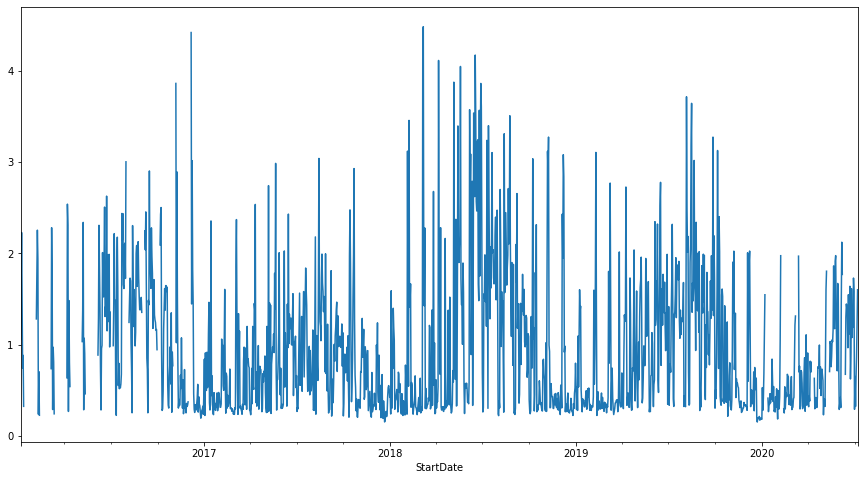

In [20]:
df['Value (kWh)'].plot(figsize=(15,8))

In [78]:
df = df['2017-01-01':'2019-12-31']

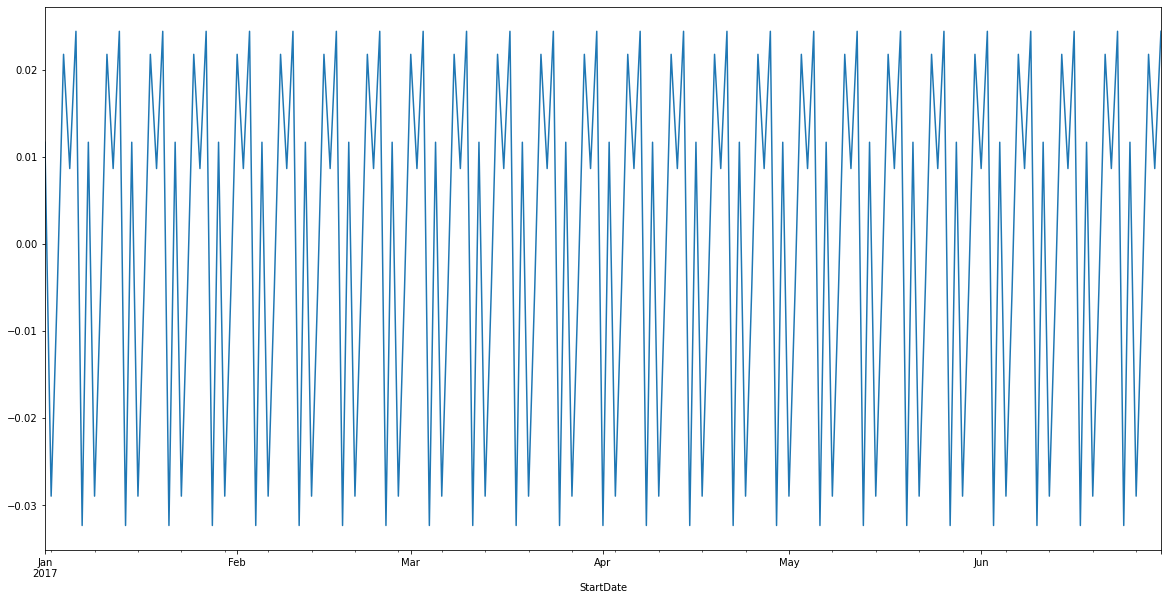

In [84]:
result = seasonal_decompose(df['Value (kWh)'])

plt.figure(figsize=(20,10))
result.seasonal.loc['2017-01-01':'2017-06-30'].plot();


In [37]:
auto_arima(df['Value (kWh)'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1095
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1054.707
Date:                Fri, 22 Jan 2021   AIC                           2115.413
Time:                        15:54:11   BIC                           2130.406
Sample:                             0   HQIC                          2121.087
                               - 1095                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4196      0.023     18.270      0.000       0.375       0.465
ma.L1         -0.9556      0.009   -109.838      0.000      -0.973      -0.939
sigma2         0.4020      0.009     43.219      0.000       0.384       0.420
===================================================================================
Ljung-Box (Q):                      157.78   Jarque-Bera (JB):              1517.51
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                             1.54
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [39]:
adf_test(df['Value (kWh)'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -6.934559e+00
p-value                 1.062823e-09
# lags used             7.000000e+00
# observations          1.087000e+03
critical value (1%)    -3.436380e+00
critical value (5%)    -2.864203e+00
critical value (10%)   -2.568188e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [42]:
stepwise_fit = auto_arima(df['Value (kWh)'],trace = True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2121.033, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2439.578, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2329.974, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2231.309, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2437.579, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2117.993, Time=1.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2146.446, Time=0.48 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2117.407, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2118.207, Time=0.68 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2267.783, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2115.413, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2229.312, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2327.975, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2116.213, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [41]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1095
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1054.707
Date:                Fri, 22 Jan 2021   AIC                           2115.413
Time:                        15:59:41   BIC                           2130.406
Sample:                             0   HQIC                          2121.087
                               - 1095                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4196      0.023     18.270      0.000       0.375       0.465
ma.L1         -0.9556      0.009   -109.838      0.000      -0.973      -0.939
sigma2         0.4020      0.009     43.219      0.000       0.384       0.420
===================================================================================
Ljung-Box (Q):                      157.78   Jarque-Bera (JB):              1517.51
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                             1.54
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
len(df)

1095

In [44]:
train = df.iloc[:1000]
test = df.iloc[1000:]

In [45]:
model = ARIMA(train['Value (kWh)'],order=(1,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Value (kWh)   No. Observations:                  999
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -975.462
Method:                       css-mle   S.D. of innovations              0.642
Date:                Fri, 22 Jan 2021   AIC                           1958.924
Time:                        16:05:21   BIC                           1978.551
Sample:                    01-02-2017   HQIC                          1966.384
                         - 09-27-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0009      0.001      0.635      0.526      -0.002       0.004
ar.L1.D.Value (kWh)     0.4219      0.031     13.569      0.000       0.361       0.483
ma.L1.D.Value (kWh)    -0.9595      0.009   -112.046      0.000      -0.976      -0.943
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3704           +0.0000j            2.3704            0.0000
MA.1            1.0422           +0.0000j            1.0422            0.0000
-----------------------------------------------------------------------------
"""

In [46]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(1,1,1) Predictions')

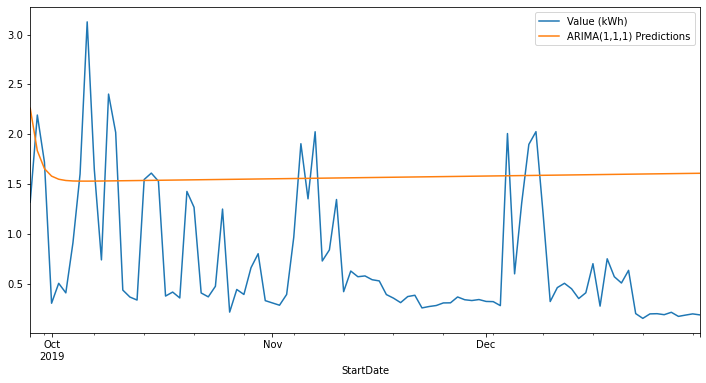

In [51]:
# predictions.mean()
ax = test['Value (kWh)'].plot(legend=True,figsize=(12,6))
predictions.plot(legend=True)

In [5]:
df.head(0)

,Value (kWh),day_of_week,notes
StartDate,,,


In [6]:
df.isnull().sum()

Value (kWh)    4248
day_of_week    4248
notes          4248
dtype: int64

In [7]:
df_sampled = df.resample('D')

In [8]:
df_sampled.agg('mean').head(20)

,Value (kWh),day_of_week
StartDate,,
2016-01-06,1.237125,2.0
2016-01-07,1.799042,3.0
2016-01-08,2.085708,4.0
2016-01-09,1.973458,5.0
2016-01-10,1.758458,6.0
2016-01-11,0.897292,0.0
2016-01-12,0.540875,1.0
2016-01-13,NaN,NaN
2016-01-14,NaN,NaN


In [31]:
df.isnull().sum

<bound method DataFrame.sum of                      Value (kWh)  day_of_week  notes
StartDate                                           
2017-01-01 00:00:00        False        False  False
2017-01-01 01:00:00        False        False  False
2017-01-01 02:00:00        False        False  False
2017-01-01 03:00:00        False        False  False
2017-01-01 04:00:00        False        False  False
...                          ...          ...    ...
2019-12-31 19:00:00        False        False  False
2019-12-31 20:00:00        False        False  False
2019-12-31 21:00:00        False        False  False
2019-12-31 22:00:00        False        False  False
2019-12-31 23:00:00        False        False  False

[26280 rows x 3 columns]>

In [38]:
df_sampled = df.resample('D').agg('mean')

In [35]:
df_sampled.head(20)

,Value (kWh),day_of_week
StartDate,,
2017-01-01 00:00:00,0.840,6
2017-01-01 01:00:00,0.731,6
2017-01-01 02:00:00,0.254,6
2017-01-01 03:00:00,0.270,6
2017-01-01 04:00:00,0.318,6
2017-01-01 05:00:00,0.229,6
2017-01-01 06:00:00,0.330,6
2017-01-01 07:00:00,0.240,6
2017-01-01 08:00:00,0.340,6


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26280 entries, 2017-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Value (kWh)  26280 non-null  float64
 1   day_of_week  26280 non-null  int64  
 2   notes        26280 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 821.2+ KB


In [36]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26280 entries, 2017-01-01 00:00:00 to 2019-12-31 23:00:00
Freq: H
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Value (kWh)  26280 non-null  float64
 1   day_of_week  26280 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 615.9 KB


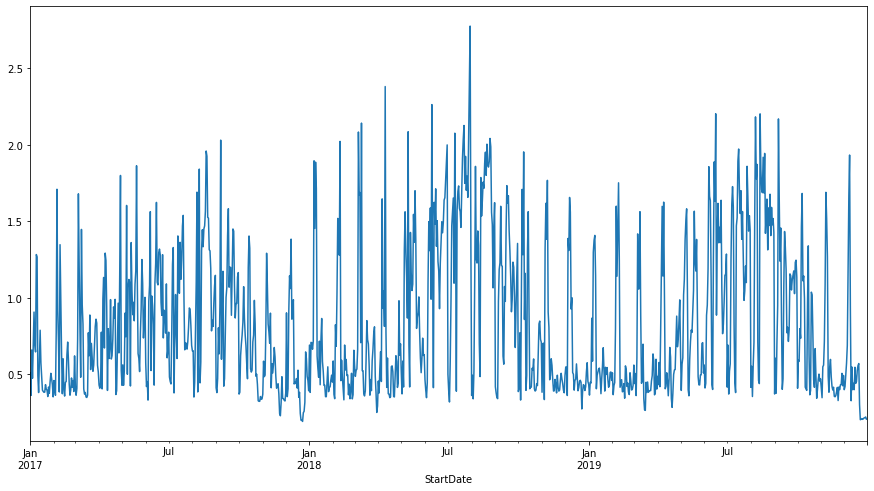

In [42]:
df_sampled['Value (kWh)'].plot(figsize=(15,8))

In [15]:
df_usage_daily = df.groupby('StartDate').sum()

df_usage_daily['day_of_week'] = df_usage_daily['day_of_week'].apply(lambda x: x/24)

notes_col = df.groupby('StartDate').first()['notes'].values
df_usage_daily['notes'] = notes_col
df_usage_daily.head()

,Value (kWh),day_of_week,notes
StartDate,,,
2016-01-06 00:00:00,1.057,0.083333,weekday
2016-01-06 01:00:00,1.171,0.083333,weekday
2016-01-06 02:00:00,0.560,0.083333,weekday
2016-01-06 03:00:00,0.828,0.083333,weekday
2016-01-06 04:00:00,0.932,0.083333,weekday


In [4]:
len(df)

35952

In [53]:
df.asfreq('d')

TypeError: 'str' object is not callable

In [17]:
df_sampled.info()

AttributeError: 'DatetimeIndexResampler' object has no attribute 'info'

In [20]:
df.head()

,Value (kWh),day_of_week,notes
StartDate,,,
2016-01-06 00:00:00,1.057,2,weekday
2016-01-06 01:00:00,1.171,2,weekday
2016-01-06 02:00:00,0.560,2,weekday
2016-01-06 03:00:00,0.828,2,weekday
2016-01-06 04:00:00,0.932,2,weekday


In [21]:
df.tail()

,Value (kWh),day_of_week,notes
StartDate,,,
2020-07-07 19:00:00,1.307,1,weekday
2020-07-07 20:00:00,2.872,1,weekday
2020-07-07 21:00:00,2.138,1,weekday
2020-07-07 22:00:00,2.199,1,weekday
2020-07-07 23:00:00,1.809,1,weekday


# CAT DATASET

In [58]:
df = pd.read_csv('../dataSet/PriceIndexCatFood.csv',index_col = 'Date' , parse_dates = True )
df = df.asfreq('MS')

In [59]:
df.head()

,CatFood
Date,
1985-12-01,100.0
1986-01-01,100.0
1986-02-01,100.0
1986-03-01,100.0
1986-04-01,100.1


In [68]:
df.isna().sum()

CatFood    0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-12-01 to 2018-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CatFood  397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


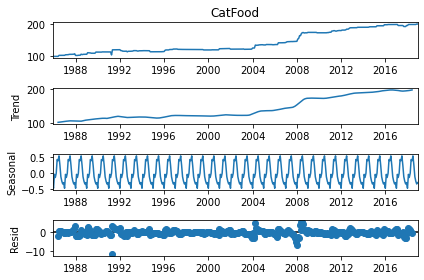

In [64]:
result = seasonal_decompose(df['CatFood'], model="add")
result.plot();

In [66]:
auto_arima(df['CatFood'], seasonal=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  397
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -713.029
Date:                Fri, 22 Jan 2021   AIC                           1436.058
Time:                        16:26:00   BIC                           1455.965
Sample:                             0   HQIC                          1443.945
                                - 397                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1379      0.079      1.755      0.079      -0.016       0.292
ar.L1          0.4556      0.230      1.977      0.048       0.004       0.907
ma.L1         -0.5972      0.231     -2.585      0.010      -1.050      -0.144
ma.L2          0.2101      0.035      6.032      0.000       0.142       0.278
sigma2         2.1448      0.058     37.005      0.000       2.031       2.258
===================================================================================
Ljung-Box (Q):                       19.22   Jarque-Bera (JB):             18153.84
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                             3.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
adf_test(df['CatFood'].diff(1))

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.010515e+01
p-value                 1.034639e-17
# lags used             2.000000e+00
# observations          3.930000e+02
critical value (1%)    -3.447099e+00
critical value (5%)    -2.868923e+00
critical value (10%)   -2.570703e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
